# 04 Tekstide kogumine

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
from wordcloud import WordCloud
from estnltk import Text
import re

Käsitsi parandatud lingid

In [8]:
data_koik = pd.read_excel('toofailid/DATA_LINKIDEGA_parandatud.xlsx', engine='openpyxl')

In [9]:
data_koik.shape

(909, 45)

In [10]:
data = data_koik[(data_koik['Lingid'] !='link puudub')
                   &(data_koik['Lingid'] !='teadmata')
                   &(data_koik['Lingid']!='venekeelne')
                   &(data_koik['Lingid']!='telesaade')
                   &(data_koik['Lingid']!='raadiosaade')]

In [11]:
data.shape

(605, 45)

In [44]:
sagedused = data['Väljaande nimi1'].value_counts()

In [45]:
sagedused

Postimees                112
Eesti Päevaleht           96
Eesti Ekspress            88
Delfi                     67
Õhtuleht                  55
Äripäev                   24
Saarte Hääl               18
Pärnu Postimees           18
Meie Maa                  14
Maaleht                   10
Sakala                    10
Virumaa Teataja            8
Elu24                      8
Kroonika                   8
Hiiu Leht                  7
Lääne Elu                  7
Harju Elu                  7
Järva Teataja              6
ERR portaal                6
Põhjarannik                5
Võrumaa Teataja            5
Müürileht                  4
Sirp                       3
Vooremaa                   3
Pealinn                    3
Pere&Kodu                  2
Oma Saar                   2
Raplamaa Sõnumid           2
Kanal2 portaal             1
Eesti Kirik                1
Puutepunktid               1
Meditsiiniuudised          1
Valgamaalane               1
Sõnumitooja                1
Lõuna-Eesti Po

In [12]:
eksp_meedia = data[((data['Väljaande nimi1']=='Delfi') 
                   |(data['Väljaande nimi1']=='Eesti Ekspress') 
                   |(data['Väljaande nimi1']=='Eesti Päevaleht')
                   |(data['Väljaande nimi1']=='Pere&Kodu')
                   |(data['Väljaande nimi1']=='Maaleht')
                   |(data['Väljaande nimi1']=='Kroonika'))]

In [13]:
pm_grupp = data[(data['Väljaande nimi1']=='Postimees') 
                   |(data['Väljaande nimi1']=='Pärnu Postimees') 
                   |(data['Väljaande nimi1']=='Sakala')
                   |(data['Väljaande nimi1']=='Virumaa Teataja')
                   |(data['Väljaande nimi1']=='Järva Teataja')
                   |(data['Väljaande nimi1']=='Lõuna-Eesti Postimees')
                   |(data['Väljaande nimi1']=='Põhjarannik')
                   |(data['Väljaande nimi1']=='Saarte Hääl')
                   |(data['Väljaande nimi1']=='Oma Saar')
                   |(data['Väljaande nimi1']=='Elu24')]

In [14]:
a_paev = data[data['Väljaande nimi1']=='Äripäev']

In [15]:
o_leht = data[data['Väljaande nimi1']=='Õhtuleht']

In [35]:
data_valik = pd.concat([eksp_meedia, pm_grupp, a_paev, o_leht], ignore_index=True)

In [16]:
eksp_meedia.shape

(271, 45)

In [17]:
pm_grupp.shape

(188, 45)

In [18]:
a_paev.shape

(24, 45)

In [19]:
o_leht.shape

(55, 45)

In [36]:
data_valik

,#,Kaebuse kuupäev,Kaebuse aasta,Väljaanne,Väljaande nimi1,Lingid,Lingid1,Unnamed: 7,Kaebuse sisu,Lahendi tulemus1,...,4.8,4.9,4.10,4.11,4.12,5.1,5.2,5.3,6.1,Koodeksipunkte
0,1080,08.12.21,2021,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Eesti Ekspress,https://ekspress.delfi.ee/number/95266325/artikkel/95330217/miks-raagib-varro-vooglaid-uha-enam-relva-haaramisest-ja-kodusojast-naen-vaga-suurt-valu-angi-ja-kibestumist,NaN,NaN,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,pressinõukogu otsus,...,0,0,0,0,0,0,0,0,0,0
1,1076,11.11.21,2021,"Delfi 05.11.21 Parkett kummis, tuul puhub läbi. Ostja esitas kümnete ehitusvigade tõttu arendaja vastu kaebuse",Delfi,https://arileht.delfi.ee/artikkel/95059013/parkett-kummis-tuul-puhub-labi-ostja-esitas-kumnete-ehitusvigade-tottu-arendaja-vastu-kaebuse,NaN,NaN,"Kaebaja leiab, et artikkel sisaldab ebatäpset ja eksitavat infot. Samuti ei ole kaebaja rahul, et talle sõna ei antud.",pressinõukogu otsus,...,0,0,0,0,0,0,0,0,0,0
2,1075,10.11.21,2021,"Eesti Ekspress 03.11.21 Suur vitamiinisõda Viimsis: farmaatsiatehase töötajad omastasid retseptid, lõid oma firma ja üritasid populaarse brändi turult välja süüa",Eesti Ekspress,https://ekspress.delfi.ee/artikkel/94965663/suur-vitamiinisoda-viimsis-farmaatsiatehase-tootajad-omastasid-retseptid-loid-oma-firma-ja-uritasid-populaarse-brandi-turult-valja-suua,NaN,NaN,"Kaebajate hinnangul sisaldab artikkel ebatäpset ja eksitavat infot ning uudised ja arvamused on segamini. Kaebajad ei ole rahul, et kaubamärgi tootepilti on kasutatud luba küsimata.",pressinõukogu otsus,...,0,0,0,0,0,0,0,0,0,0
3,1073,02.11.21,2021,"Delfi 02.11.21 Robert Sarv kutsus piirangutevastaseid üles riiki kohtusse kaebama. Advokatuuri esimees: see ei ole advokaadile kohane, asja tuleb arutada aukohtus",Delfi,https://www.delfi.ee/artikkel/95033375/robert-sarv-kutsus-piirangutevastaseid-ules-riiki-kohtusse-kaebama-advokatuuri-esimees-see-ei-ole-advokaadile-kohane-asja-tuleb-arutada-aukohtus,NaN,NaN,"Kaebaja leiab, et loo pealkiri on vale sisuga, artikkel sisaldab ebatäpset, moonutatud ja eksitavat infot ning talle ei antud sõna.",pressinõukogu otsus,...,0,0,0,0,0,0,0,0,0,0
4,1072,01.11.21,2021,Eesti Ekspress 22.09.21 Pärnu revisjonikomisjoni esimees jäi prügilas vahele korruptsiooniga,Eesti Ekspress,https://ekspress.delfi.ee/artikkel/94639229/parnu-revisjonikomisjoni-esimees-jai-prugilas-vahele-korruptsiooniga,NaN,NaN,"Kaebaja hinnangul sisaldab artikkel valeinfot, sest tema vastu ei ole süüdistust esitatud.",pressinõukogu otsus,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,88,16.02.05,2005,SL Õhtuleht 11.02.05 Eksministrid lärmasid riigikogu valvelauas?,Õhtuleht,https://www.ohtuleht.ee/169755/eksministrid-larmasid-riigikogu-valvelauas,NaN,NaN,Artiklis on kaebaja meelest tegu ebatäpse ja eksitava infoga.,pressinõukogu otsus,...,0,0,0,0,0,0,0,0,0,0
534,68,05.08.04,2004,"SL Õhtuleht 04.08.04 Muusikaärimees Gunnar Loho: ""Läbi minu voodi tahavad paljud staariks saada""",Õhtuleht,https://naine.ohtuleht.ee/160700/muusikaarimees-gunnar-loho-labi-minu-voodi-tahavad-paljud-staariks-saada,NaN,NaN,Kaebaja peab artiklit solvavaks ja eksitavaks.,pressinõukogu otsus,...,0,0,0,0,0,0,0,0,0,0
535,66,09.07.04,2004,SL Õhtuleht 26.06.04 Äsja kooli lõpetanud nooruk sõitis väikese lapse surnuks,Õhtuleht,https://www.ohtuleht.ee/158848/asja-kooli-lopetanud-nooruk-soitis-vaikese-lapse-surnuks,NaN,NaN,"Kaebaja leiab, et artiklis on kontrollimata fakte, mis on laimava sisuga",pressinõukogu otsus,...,0,0,0,0,0,0,0,0,0,0
536,38,28.11.03,2003,SL Õhtuleht 22.11.03 Leppeta ei saa,Õhtuleht,https://www.ohtuleht.ee/149286/leppeta-ei-saa,NaN,NaN,"Kaebaja leiab, et antud juhtkirjaga luuakse tahtlikult halvustav ja alavääristav suhtumine kodanikeühendustees, eriti aga ühiskondlikule leppele allakirjutanute suhtes.",pressinõukogu otsus,...,0,0,0,0,0,0,0,0,0,0


Veebilehtedelt kogutud saadakse BeautifulSoup abil järgmine info:

1) artikli pealkiri

2) artikli tekst

In [20]:
# Ekspress Meedia tekstide kogumine
headers = requests.utils.default_headers()
headers.update(
  { 'User-Agent': 'my crawler (anneliis@ut.ee) / on studying purpose', }
)

jrk_nr_e = []
pealkirjad_e = []
tekstid_e = []

for index, row in tqdm(eksp_meedia.iterrows()):
    url = row['Lingid']
    jrk = row['#']
    jrk_nr_e.append(jrk)
    try:
        yhendatud_tekst = []
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        pealkiri = soup.find("meta", {"property" :"og:title"})['content']

        tekst = soup.findAll("div",{"class" : "C-fragment-html"})

        for t in tekst:
            yhendatud_tekst.append(t.text)
          
        tekstid_e.append(yhendatud_tekst)
        
    except Exception as e:
        print("Exception is :", e, url)
        
    pealkirjad_e.append(pealkiri)
    artikkel_e = [' '.join(article) for article in tekstid_e]

271it [05:14,  1.16s/it]


In [21]:
artiklid_e = {'#': jrk_nr_e, 'title': pealkirjad_e, 'text': artikkel_e}
data_e = pd.DataFrame(artiklid_e, columns = ['#', 'title', 'text'])

In [22]:
data_e

#  \
0    1080   
1    1076   
2    1075   
3    1073   
4    1072   
..    ...   
266    26   
267    20   
268    13   
269     3   
270     2   

                                                                                                                                                   title  \
0                                       Miks räägib Varro Vooglaid üha enam relva haaramisest ja kodusõjast? "Näen väga suurt valu, ängi ja kibestumist"   
1                                                        Parkett kummis, tuul puhub läbi. Ostja esitas kümnete ehitusvigade tõttu arendaja vastu kaebuse   
2              Suur vitamiinisõda Viimsis: farmaatsiatehase töötajad omastasid retseptid, lõid oma firma ja üritasid populaarse brändi turult välja süüa   
3    Robert Sarv kutsus piirangutevastaseid üles riiki kohtusse kaebama. Advokatuuri esimees: see ei ole advokaadile kohane, asja tuleb arutada aukohtus   
4                                                                                  Pärnu revisjoni­komisjoni esimees jäi prügilas vahele korruptsiooniga   
..                                                                                                                                                   ...   
266                                                                                                                   Tudeng palus õppejõult "'vihjeid"'   
267                                                                                                                              Abielu valus proovikivi   
268                                                                                                                                       Iseseisvuspäev   
269                                                                                                        Ettevõtted hoiavad võõra vöötkoodi abil kokku   
270                                                                                                         Juustutootjad keelduvad koostööst Estoveriga   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [23]:
# Postimees Grupp tekstide kogumine
headers = requests.utils.default_headers()
headers.update(
  { 'User-Agent': 'my crawler (anneliis@ut.ee) / on studying purpose', }
)

jrk_nr_pm = []
pealkirjad_pm = []
tekstid_pm = []

for index, row in tqdm(pm_grupp.iterrows()):
    url = row['Lingid']
    jrk = row['#']
    jrk_nr_pm.append(jrk)
    try:
        yhendatud_tekst = []
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        pealkiri = soup.find("meta", {"property" :"og:title"})['content']
               
        tekst = soup.findAll("div",{"class" : "article-body"})
        
        for t in tekst:
            p = t.find_all('p')
            for r in p:
                yhendatud_tekst.append(r.text)
          
        tekstid_pm.append(yhendatud_tekst)
        
    except Exception as e:
        print("Exception is :", e, url)
        
    pealkirjad_pm.append(pealkiri)
    artikkel_pm = [' '.join(article) for article in tekstid_pm]

188it [01:50,  1.70it/s]


In [24]:
artiklid_pm = {'#': jrk_nr_pm, 'title': pealkirjad_pm, 'text': artikkel_pm}
data_pm = pd.DataFrame(artiklid_pm, columns = ['#', 'title', 'text'])

In [25]:
data_pm

#  \
0    1081   
1    1074   
2    1068   
3    1062   
4    1050   
..    ...   
183    42   
184    37   
185    23   
186     8   
187     6   

                                                                                                           title  \
0                                  Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis   
1            VIDEOD &#10217; Öises Tartus Emajõkke lennutatud ratastool põhjustas sotsiaalmeedias pahameeletormi   
2                                           Sakslasest politoloog nõuab kohtus Varro Vooglaiult kahju hüvitamist   
3    Korruptsioonis süüdistatavad Otepää vallajuhid on uuesti luubi all, abivallavanemat kahtlustatakse kelmuses   
4                                            PM Nädal &#10217; Biolagunevad kotid – kasutada vaid viimases hädas   
..                                                                                                           ...   
183                                                              Kaitsevägi soovib neljandiku võrra rohkem raha    
184                                                              Kütusesolkijate elu            tehakse kibedaks   
185                                                                   Meediaarvustus: Rollikonflikt Kuku raadios   
186                                                             Järvi fondi juhid jagasid raha enda projektidele   
187                                                                Päevaintervjuu: Selja hakkab uut sängi otsima   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [26]:
# Äripäeva tekstide kogumine
headers = requests.utils.default_headers()
headers.update(
  { 'User-Agent': 'my crawler (anneliis@ut.ee) / on studying purpose', }
)

jrk_nr_a = []
pealkirjad_a = []
tekstid_a = []

for index, row in tqdm(a_paev.iterrows()):
    url = row['Lingid']
    jrk = row['#']
    jrk_nr_a.append(jrk)
    try:
        yhendatud_tekst = []
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        pk = soup.find("title")
        pealkiri = pk.get_text()
        
        loik = soup.find("p", {'class': "Leadin__Paragraph-sc-1wa7524-0 fiHPQG"})
        
        if loik:
            yhendatud_tekst.append(loik.text)
        
        tekst = soup.find("div", {'class': "ArticleMain__ArticleWrapper-sc-1t8gf4o-0 hkPzeH"})
        
        leia = tekst.find_all("div",{"class" : 'Text__Paragraph-sc-9d3822-0 ikYVcc'})
        
        for t in leia:
            yhendatud_tekst.append(t.text)
          
        tekstid_a.append(yhendatud_tekst)
        
    except Exception as e:
        print("Exception is :", e, url)
        
    pealkirjad_a.append(pealkiri)
    artikkel_a = [' '.join(article) for article in tekstid_a]

24it [00:37,  1.57s/it]


In [27]:
artiklid_a = {'#': jrk_nr_a, 'title': pealkirjad_a, 'text': artikkel_a}
data_a = pd.DataFrame(artiklid_a, columns = ['#', 'title', 'text'])

In [28]:
data_a

#  \
0   1053   
1    979   
2    968   
3    934   
4    872   
5    630   
6    628   
7    616   
8    611   
9    563   
10   515   
11   477   
12   465   
13   424   
14   368   
15   308   
16   295   
17   150   
18    99   
19    62   
20    60   
21    58   
22    43   
23    34   

                                                                                   title  \
0                                      Kino Kosmose hoone liikus skandaalse ärimehe manu   
1   Allmaailma liidri vabaduse eest 350 000 eurot maksnud ettevõte sai osa rahast tagasi   
2                                           Coop Pank: pangad kriisis heategevust ei tee   
3                            Äripäeva suur pensioniküsitlus: rahvas valmistub rahasajuks   
4                                       Milline pank on kohalikule investorile soodsaim?   
5                                                             Eesti Energia solgib turgu   
6                                                       Tallinn Dollsi hämarad ärikombed   
7                                                 Õhus veel üks keelatud riigiabi juhtum   
8                                             Maksuamet OÜst: töö eest tuleb tasu maksta   
9                                                                Kõlvart kaevati kaposse   
10                                                           EASi nõukogu valis uue juhi   
11                                           Piret Reiljan: Olerex peidab ikka tarnijaid   
12                                 Linnaosa­vanem peidab oma ettevõttes võlgnikust venda   
13                                                         Kriminaalasi CV Keskuse vastu   
14                                   Aasmäe eelistas pankrotiistungile linnas jalutamist   
15                                                             Inkassod jännis võlgadega   
16                                      Kohustuslik e-aruandlus ettevõtjate turmtule all   
17                          Ilona Saari asub Preatoni vastu tunnistama videotehnika abil   
18                                                  Kullaäri võtab töötaja palgata tööle   
19                                            Maksuametnik samas firmas kütusepesijatega   
20                                                           Kaitsevägi tellis röövraide   
21                                                                        Vaene Fellini!   
22                                                         Netimüüjate lubadused katteta   
23                                                           Kapol Paltsu firmad sihikul   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [29]:
# Õhtulehe tekstide kogumine
headers = requests.utils.default_headers()
headers.update(
  { 'User-Agent': 'my crawler (anneliis@ut.ee) / on studying purpose', }
)

jrk_nr_o = []
pealkirjad_o = []
tekstid_o = []

for index, row in tqdm(o_leht.iterrows()):
    url = row['Lingid']
    jrk = row['#']
    jrk_nr_o.append(jrk)
    try:
        yhendatud_tekst = []
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        pk = soup.find("title")
        pealkiri = pk.get_text()
        
        article  = soup.find("article", {"class" : "page-layout--container"})
        article1  = soup.find("article", {"class" : "article active-art"})
        
        if article:
            loik = article.find("div", {'class': "article-main--content article-main--excerpt formatted--content"})
            yhendatud_tekst.append(loik.text)
            tekst = article.find_all("p")
        
        if article1:
            tekst = article1.find_all("p")
        
        for t in tekst:
            yhendatud_tekst.append(t.text)
          
        tekstid_o.append(yhendatud_tekst)
        
    except Exception as e:
        print("Exception is :", e, url)
        
    pealkirjad_o.append(pealkiri)
    artikkel_o = [' '.join(article) for article in tekstid_o]

55it [00:15,  3.55it/s]


In [30]:
artiklid_o = {'#': jrk_nr_o, 'title': pealkirjad_o, 'text': artikkel_o}
data_o = pd.DataFrame(artiklid_o, columns = ['#', 'title', 'text'])

In [31]:
data_o

,#,title,text
0,1054,"Inga Raitar | Kõik parkimisvägivalla ohvrid, ühinege!","Mis tunne on inimesel, kes läheb igal hommikul tööle teades, et talle leiva lauale toov tegevus kutsub teistes inimestes esile ainult pahameelt? Ainsaks viisiks, kuidas selline inimene saab depressiooni ja enesepõlgusesse langemata edasi tegutseda, on samaväärselt alavääristada teisi kaaskodanikke. Tekitada neis sama ebameeldiv tunne, mis tal endal on. Tekib kummaline nõiaring, millesse on ilmselt paljud autoomanikud sattunud on. Räägin parkimistrahvidest. Mis tunne on inimesel, kes läheb igal hommikul tööle teades, et talle leiva lauale toov tegevus kutsub teistes inimestes esile ainult pahameelt? Ainsaks viisiks, kuidas selline inimene saab depressiooni ja enesepõlgusesse langemata edasi tegutseda, on samaväärselt alavääristada teisi kaaskodanikke. Tekitada neis sama ebameeldiv tunne, mis tal endal on. Tekib kummaline nõiaring, millesse on ilmselt paljud autoomanikud sattunud on. Räägin parkimistrahvidest. Reegel või inimlikkus, selles on küsimus"
1,1048,Riigikogulase ja kunstniku kohtuvaidlus sai läbi,"Riigikohtu otsusega leidis lõplikku kinnitamist, et riigikogu liige Helle-Moonika Helme ei pea ümber lükkama end kunstnikuks nimetava Toomas Reisalu petiseks nimetamist. Harju maakohus jättis Toomas Reisalu hagi ebaõigete andmete ümberlükkamiseks rahuldamata. Tallinna ringkonnakohus rahuldas Reisalu nõude osaliselt – kohustades Helmet avaldama, et Reisalu oli seotud iseenda aktsiooniga „Langetame kütuseaktsiisi“, vahendas Helme esindaja, vandeadvokaat Raul Ainla Õhtulehele. Helme FB-postituse mõte oli aga see, et Reisalu ei ole seotud nende inimestega, kes maksude pärast tõeliselt südant valutavad. Olulisemas osas – Reisalu petiseks nimetamine – jäi maakohtu otsus jõusse, see tähendab, et Helme ei pea ümber lükkama Reisalu petiseks nimetamist, selgitas Ainla. Tema sõnul aitas ringkonnakohus kummalisel kombel Reisalut oma nõuet ümber formuleerida, et seda saaks ikka rahuldada, mis tähendab taganemist meie kohtumenetluses kehtivast võistlevuse põhimõttest. Riigikohus seda rikkumiseks ei lugenud."
2,1046,Madis Sütt peab Isamaast na***i tõmbama! Parempoolne väidab: Seeder ja Sibul olid 400 uuest liikmest teadlikud,"Õhtupoolikul kogunev erakonna Isamaa eestseisus arutab muu hulgas partei Tartu juhatuse ettepanekut heita erakonnast välja Madis Sütt, kes liitus Isamaaga jaanuaris ja tõi mõne kuuga juurde üle 400 liikme. Partei juhatusse kuuluva Parempoolsete esindaja Mihkel Kübara hinnangul pole Sütil enam erakonnas kohta, kuid selgitusi peavad jagama ka teised. „Olen veendunud, et erakonna peasekretär ja esimees olid teadlikud, et Tartus võetakse vastu 400 liiget,“ ütles Kübar. Isamaa erakonna Tartu piirkonna juhatus otsustas 26. aprilli koosolekul vastu võtta 403 uut liiget. Suurema osa liitujaid tõi endaga kaasa jaanuaris erakonna liikmeks astunud Madis Sütt. Ta on varem katsetanud poliitilist tegevust erakonna Rahva Tahe asutamisega 2018. aastal. Toona saadi partei loomiseks vajalikud 500 liiget kokku tänu sotsiaalmeedias levinud reklaamile, millega kutsuti üles loodava erakonnaga ühinema. Kõigi liitujate vahel loositi välja neli Samsung Galaxy nutitelefoni."
3,1011,ET AINULT KEEGI TEADA EI SAAKS! Imre Rammul survestas ajakirjanikku: „Ma panin oma inimesed teid jälitama!“,"„Meie raviasutuse vastuvõtt on tasuline. Kui teil puudub võimekus maksta sidevahendi eest, peaksite pöörduma ikka enda tohtri poole,“ teatas psühhiaater Imre Rammul temalt kirja teel abi otsinud noormehele. Lisaks saadab psühhiaater süüdistavaid kirju noormehe sõbrannale. Kui Õhtulehe ajakirjanik hakkab juhtumit uurima, siis ründab Rammul teda telefonitsi: „Ma panin oma inimesed teid jälitama ja pankrotimenetleja töösse.“ Tegelikult pöördus noormees psühhiaater Imre Rammuli poole just kirjalikult seepärast, et ta tuli välisriigist ega olnud jõudnud veel telefoni soetada. Arsti üleolev vastus tegi aga niigi hapras seisus noormehe veel enam katki. Tema hea sõber Anneli otsustas, et ves

In [32]:
data_koos = pd.concat([data_e, data_pm, data_a, data_o], ignore_index=True)

In [33]:
data_koos

#  \
0    1080   
1    1076   
2    1075   
3    1073   
4    1072   
..    ...   
533    88   
534    68   
535    66   
536    38   
537    35   

                                                                                                                                                   title  \
0                                       Miks räägib Varro Vooglaid üha enam relva haaramisest ja kodusõjast? "Näen väga suurt valu, ängi ja kibestumist"   
1                                                        Parkett kummis, tuul puhub läbi. Ostja esitas kümnete ehitusvigade tõttu arendaja vastu kaebuse   
2              Suur vitamiinisõda Viimsis: farmaatsiatehase töötajad omastasid retseptid, lõid oma firma ja üritasid populaarse brändi turult välja süüa   
3    Robert Sarv kutsus piirangutevastaseid üles riiki kohtusse kaebama. Advokatuuri esimees: see ei ole advokaadile kohane, asja tuleb arutada aukohtus   
4                                                                                  Pärnu revisjoni­komisjoni esimees jäi prügilas vahele korruptsiooniga   
..                                                                                                                                                   ...   
533                                                                                                          Eksministrid lärmasid riigikogu valvelauas?   
534                                                                            Muusikaärimees Gunnar Loho: Läbi minu voodi tahavad paljud staariks saada   
535                                                                                             Äsja kooli lõpetanud nooruk sõitis väikese lapse surnuks   
536                                                                                                                                       Leppeta ei saa   
537                                                                                        Treener: «See oli ikkagi riigikoondis, mitte turule sõitjad.»   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [34]:
data_koos.shape

(538, 3)

In [37]:
df =data_koos.merge(data_valik, left_on='#', right_on='#')

In [38]:
df

#  \
0    1080   
1    1076   
2    1075   
3    1073   
4    1072   
..    ...   
533    88   
534    68   
535    66   
536    38   
537    35   

                                                                                                                                                   title  \
0                                       Miks räägib Varro Vooglaid üha enam relva haaramisest ja kodusõjast? "Näen väga suurt valu, ängi ja kibestumist"   
1                                                        Parkett kummis, tuul puhub läbi. Ostja esitas kümnete ehitusvigade tõttu arendaja vastu kaebuse   
2              Suur vitamiinisõda Viimsis: farmaatsiatehase töötajad omastasid retseptid, lõid oma firma ja üritasid populaarse brändi turult välja süüa   
3    Robert Sarv kutsus piirangutevastaseid üles riiki kohtusse kaebama. Advokatuuri esimees: see ei ole advokaadile kohane, asja tuleb arutada aukohtus   
4                                                                                  Pärnu revisjoni­komisjoni esimees jäi prügilas vahele korruptsiooniga   
..                                                                                                                                                   ...   
533                                                                                                          Eksministrid lärmasid riigikogu valvelauas?   
534                                                                            Muusikaärimees Gunnar Loho: Läbi minu voodi tahavad paljud staariks saada   
535                                                                                             Äsja kooli lõpetanud nooruk sõitis väikese lapse surnuks   
536                                                                                                                                       Leppeta ei saa   
537                                                                                        Treener: «See oli ikkagi riigikoondis, mitte turule sõitjad.»   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [39]:
df.to_csv('toofailid/DATA_valik.csv',index=False)
read_file = pd.read_csv (r'toofailid/DATA_valik.csv')
read_file.to_excel (r'toofailid/DATA_valik.xlsx', index = None, header=True)

# Sõnapilvede loomine

In [46]:
#https://et.wikipedia.org/wiki/Sides%C3%B5na
#https://www.taskutark.ee/m/asesonad/
#sidesõnad
stopsõnad = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni']
#sidesõnad ja asesõnad
stopsõnad_uus = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni', 'siis', 'ka', 'nii', 'kas',
             'mina', 'ma', 'meie', 'me', 'sina', 'sa', 'teie', 'te', 'tema', 'ta', 'nemad', 'nad',
             'enese', 'enda', 'iseenese', 'iseenda', 'oma', 'üksteise', 'teineteise',
             'see', 'too', 'sama', 'seesama', 'toosama', 'teine', 'muu',
             'niisugune', 'samasugune', 'niisamasugune', 'selline', 'seesugune', 'säärane','säherdune', 
             'taoline', 'selletaoline', 'kes', 'mis', 'kumb', 'missugune', 'milline', 'misuke', 'mitu', 'mitmes', 'mitmendik',
             'ise', 'oma', 'iga', 'igaüks', 'igamees', 'kõik', 'mõlemad', 'kumbki', 'emb-kumb', 'kogu', 'terve',
             'keegi', 'miski', 'mingi', 'mingisugune', 'miskisugune', 'ükski', 'mitu', 'mitmes', 'mitu-setu', 'mitmes-setmes',
             'mõni', 'mõningane', 'paljud', 'üks', 'teine', 'oma', 'enese', 'enda', 'omaenese', 'omaenda', 'iseoma', 
             'iseenese', 'iseenda', 'emb', 'mõlema', 'palju']

## Nimi- ja omadussõnade kasutamine

EstNLTK vahenditega vaadeldakse uudistes esinevate sõnade lemmasid ja sõnade liike. Edaspidiseks vaatluseks eraldatakse nimisõnad (sõnaliik S) ja  omadussõnad (sõnaliigid A - algvõrre, C - keskvõrre, U - ülivõrre).

In [55]:
# Nimisõnade ja omadussõnade kasutamine

nimi_omadus_sonad = []
for i in tqdm(range (0, len(df))):
    rida = df.iloc[i]
    tekst = Text(rida[2]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'S' or sona[0][1] == 'A' or sona[0][1] == 'C' or sona[0][1] == 'U':
            nimi_omadus_sonad.append(sona[0][0])

nimi_omadus_words = ' '.join(map(str, nimi_omadus_sonad))

100%|████████████████████████████████████████████████████████████████████████████████| 538/538 [02:16<00:00,  3.95it/s]


Nimisõnu ja omadussõnu sõnapilves:  88306


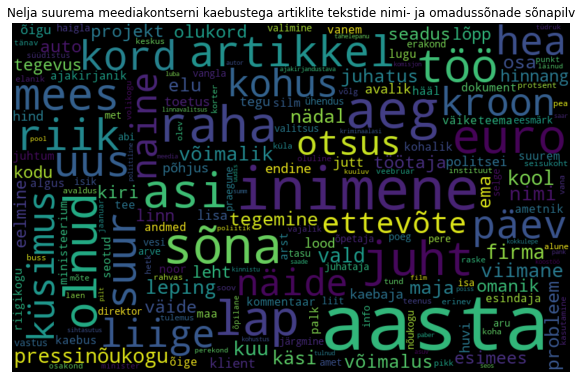

In [65]:
wordcloud_nimi_omadus = WordCloud(stopwords = stopsõnad_uus, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(nimi_omadus_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_nimi_omadus, interpolation='bilinear')
plt.title("Nelja suurema meediakontserni kaebustega artiklite tekstide nimi- ja omadussõnade sõnapilv")
#plt.savefig('remmelgas/joonis1_Delfi_Haabersti_hoberemmelgas_nimi_omadus_sõnapilv.png')
plt.axis("off")
print("Nimisõnu ja omadussõnu sõnapilves: ", len(nimi_omadus_sonad))

## Nimi- ja omadussõnade esinemissagedus ning osakaal

In [57]:
df_1 =pd.DataFrame(nimi_omadus_sonad, columns=['sõna'])
sagedused_1 = df_1.groupby(['sõna']).size().reset_index(name='esinemissagedus').sort_values(by='esinemissagedus', ascending=False)[:10]
sagedused_1['osakaal %']= (sagedused_1['esinemissagedus']/len(nimi_omadus_sonad)*100)

In [66]:
print("Nelja suurema meediakontserni kaebustega artiklite tekstide nimi- ja omadussõnade TOP 10")
sagedused_1

Nelja suurema meediakontserni kaebustega artiklite tekstide nimi- ja omadussõnade TOP 10


,sõna,esinemissagedus,osakaal %
197,aasta,1239,1.403076
3058,inimene,652,0.738342
282,aeg,511,0.578670
12059,sõna,476,0.539035
10234,raha,463,0.524313
6027,laps,429,0.485811
851,asi,413,0.467692
2050,euro,410,0.464295
3377,juht,396,0.448441
8477,olnud,372,0.421262


## Verbide kasutamine

100%|████████████████████████████████████████████████████████████████████████████████| 538/538 [02:24<00:00,  3.73it/s]


Verbe sõnapilves:  47391


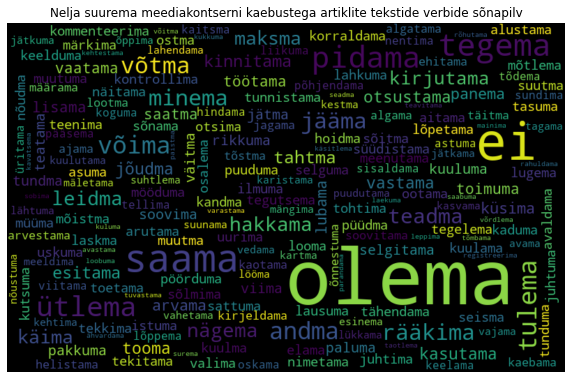

In [67]:
verb_sonad = []
for i in tqdm(range (0, len(df))):
    rida = df.iloc[i]
    tekst = Text(rida[2]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'V':
            verb_sonad.append(sona[0][0])

verb_words = ' '.join(map(str, verb_sonad))

wordcloud_verb = WordCloud(stopwords = stopsõnad_uus, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(verb_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_verb, interpolation='bilinear')
plt.title("Nelja suurema meediakontserni kaebustega artiklite tekstide verbide sõnapilv")
#plt.savefig('remmelgas/joonis2_Delfi_Haabersti_hoberemmelgas_sõnapilv_verb_sonad.png')
plt.axis("off")
print("Verbe sõnapilves: ", len(verb_sonad))

In [68]:
print("Verbe sõnapilves: ", len(verb_sonad))

Verbe sõnapilves:  47391


## Verbide esinemissagedus ja osakaal

In [69]:
df_2 =pd.DataFrame(verb_sonad, columns=['sõna'])
sagedused_2 = df_2.groupby(['sõna']).size().reset_index(name='esinemissagedus').sort_values(by='esinemissagedus', ascending=False)[:10]
sagedused_2['osakaal %']= (sagedused_2['esinemissagedus']/len(verb_sonad)*100)

In [70]:
print("Nelja suurema meediakontserni kaebustega artiklite tekstide verbide TOP 10")
sagedused_2

Nelja suurema meediakontserni kaebustega artiklite tekstide verbide TOP 10


,sõna,esinemissagedus,osakaal %
861,olema,9757,20.588297
120,ei,3318,7.001329
1147,saama,1634,3.447912
1347,tegema,1012,2.135427
939,pidama,903,1.905425
1684,ütlema,787,1.660653
1408,tulema,677,1.428541
1630,võima,618,1.304045
37,andma,575,1.213311
1642,võtma,549,1.158448
